In [1]:
import numpy as np
from numpy import sqrt
from chaos_game import *
from PIL import Image
import bezier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
params = {
    'figure.figsize': (21, 11),
}
plt.rcParams.update(params)

# Number of points to construct
N = int(1e5)
# size of the final image
size = 1024
# interval between frames when rendering the animation
interval = 250

## Plot the dachshund

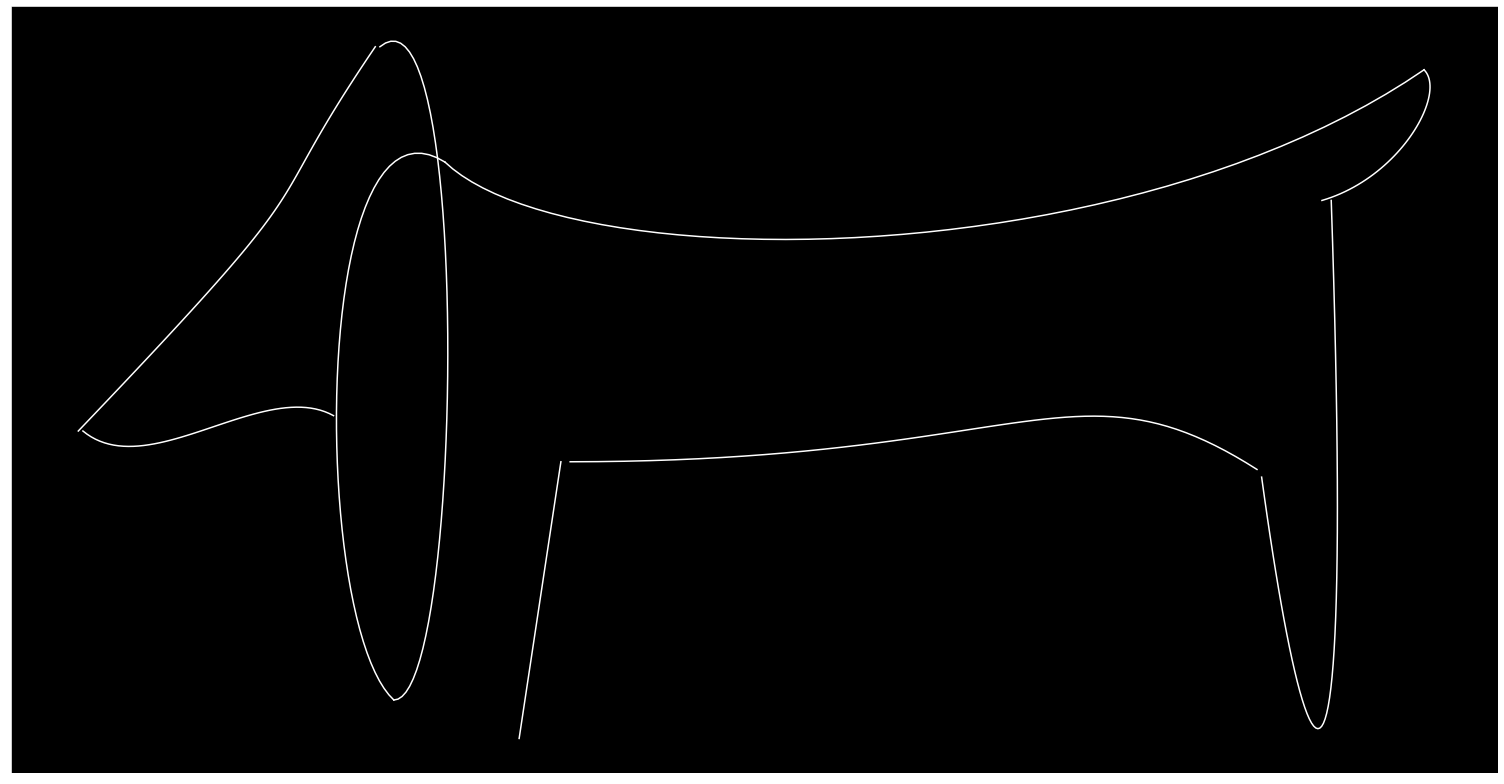

In [3]:
# nodes = np.asfortranarray([
#      [0.0, 0.625, 1.0],
#      [0.0, 0.5  , 0.5],
#  ])

nodes_dict = {
    'front_leg': np.array(
        [
            [180, 280], [183, 268], [186, 256], [189, 244],
        ]
    ).T,
    'tummy': np.array(
        [
            [191, 244], [290, 244], [300, 230], [339, 245],
        ]
    ).T,
    'back_leg': np.array(
        [
            [340, 246], [350, 290], [360, 300], [355, 210],
        ]
    ).T,
    'tail': np.array(
        [
            [353, 210], [370, 207], [380, 196], [375, 193],
        ]
    ).T,
    'back': np.array(
        [
            [375, 193], [310, 220], [190, 220], [164, 205],
        ]
    ).T,
    'ear_start': np.array(
        [
            [164, 205], [135, 194], [135, 265], [153, 275],
        ]
    ).T,
    'ear_finish_and_head': np.array(
        [
            [153, 275], [168, 275], [170, 180], [150, 190],
        ]
    ).T,
    'nose': np.array(
        [
            [149, 190], [122, 214], [142, 204], [85, 240],
        ]
    ).T,
    'mouth': np.array(
        [
            [86, 240], [100, 247], [125, 233], [140, 238],
        ]
    ).T,
}

fig, ax = plt.subplots(nrows=1, ncols=1)
size_x, size_y = 500, 500
num_pts = 50
grids = dict()
for key, nodes in nodes_dict.items():
    nodes[1] = size_y - nodes[1]  # flip
    curve = bezier.Curve(nodes, degree=3)
    grids[key] = curve.evaluate_multi(np.linspace(0, 1, num_pts)).T
    curve.plot(num_pts, ax=ax, color='white')
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

## Check the Bat-Signal

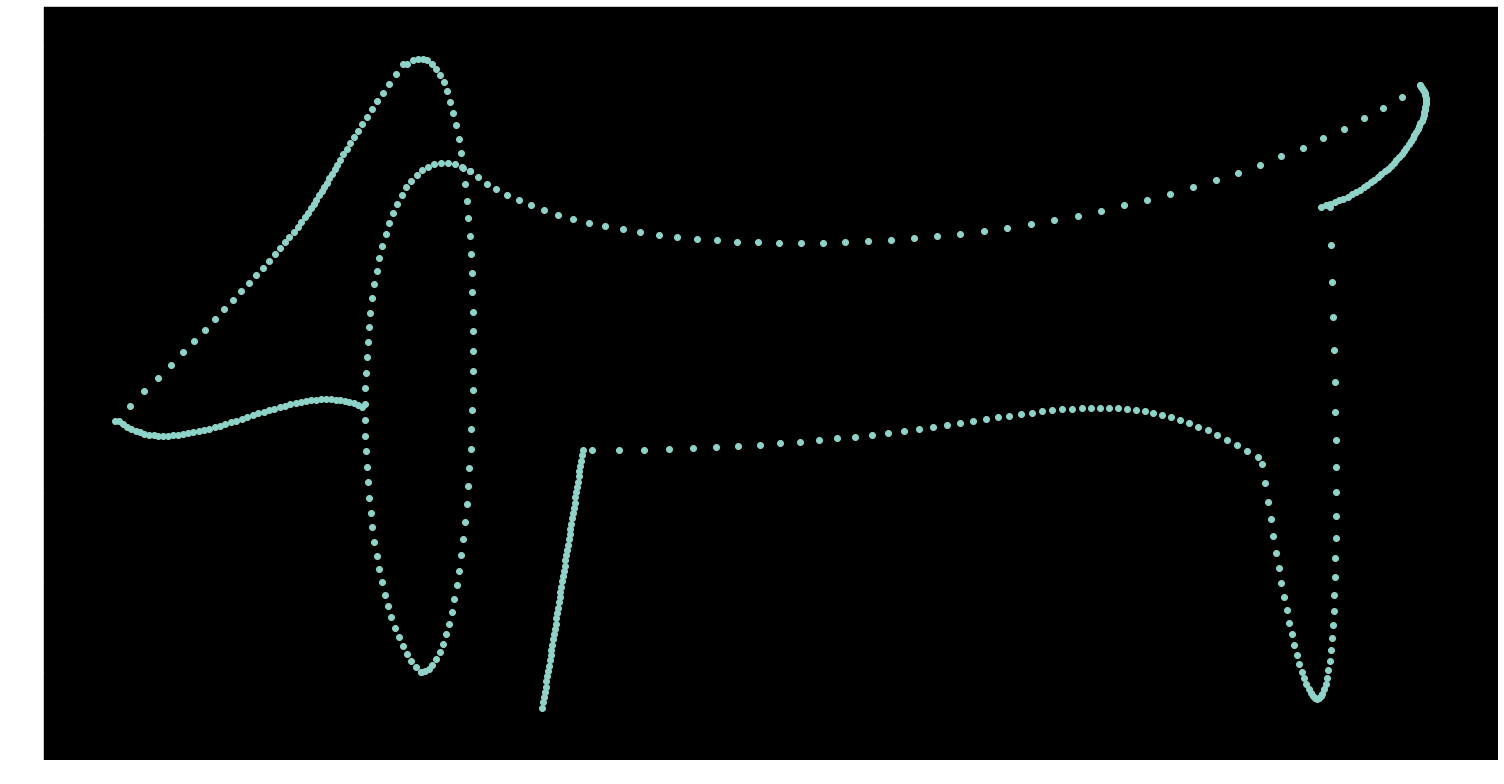

In [4]:
grid = np.concatenate(
    [grid for _, grid in grids.items()]
)

grid[:, 0] /= size_x
grid[:, 1] /= size_y

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(grid[:, 0], grid[:, 1])
plt.tight_layout()
plt.show()

## Wuf wuf!

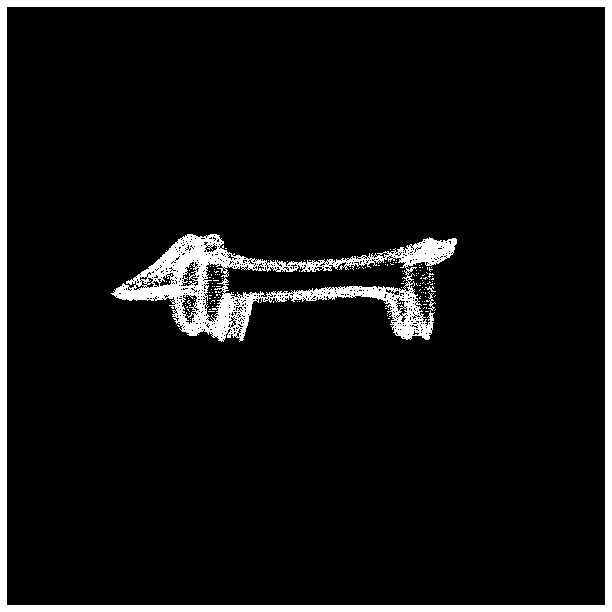

In [5]:
w = 0.9
x, y = play_game(N, w, grid)
im = render_image(x, y, size)
plt.axis('off')
plt.imshow(im)

## Animated dachshund

In [12]:
fig = plt.figure()

frames = 100
w = np.linspace(0.5, 0.99, frames)

x, y = play_game(N, w[0], grid)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], grid)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    x, y = play_game(N, w[i], grid)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [ ]:
anim.save('sierpinski_dachshund_2.gif', writer='imagemagick', fps=30)